<a href="https://colab.research.google.com/github/catherine4502/CatherineCelinaD/blob/main/Hand_Written_digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
hd=load_digits()

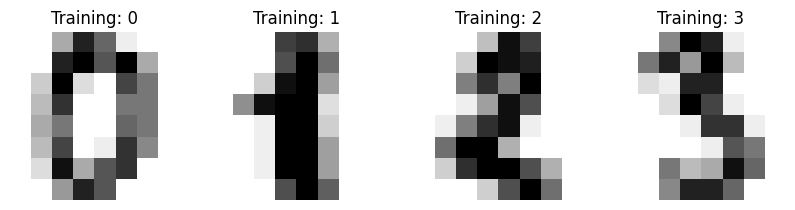

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

In [ ]:
hd.images.shape

(1797, 8, 8)

In [ ]:
hd.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
hd.images[0].shape

(8, 8)

In [ ]:
len(hd.images)

1797

In [ ]:
n_samples = len(hd.images)
data= hd.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling image data


In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.max()


1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data, hd.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

Predict test data

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([6, 9, 4, 7, 0, 2, 0, 1, 9, 5, 8, 3, 6, 1, 6, 7, 6, 3, 9, 7, 4, 1,
       5, 0, 0, 4, 2, 1, 4, 4, 6, 8, 4, 5, 3, 9, 1, 2, 1, 8, 6, 9, 6, 1,
       5, 7, 7, 5, 8, 2, 5, 1, 9, 6, 5, 7, 4, 5, 4, 0, 2, 7, 7, 5, 9, 2,
       7, 2, 5, 6, 0, 6, 5, 8, 5, 3, 5, 5, 2, 4, 1, 7, 9, 7, 4, 4, 5, 9,
       1, 5, 0, 6, 3, 8, 9, 5, 9, 8, 9, 9, 8, 6, 1, 0, 4, 5, 1, 2, 2, 3,
       1, 9, 9, 9, 3, 0, 6, 2, 9, 3, 6, 2, 2, 6, 0, 2, 7, 5, 0, 9, 8, 2,
       0, 6, 8, 0, 2, 8, 6, 2, 7, 3, 3, 7, 6, 5, 8, 0, 7, 1, 4, 1, 6, 4,
       6, 6, 4, 7, 0, 6, 9, 6, 8, 3, 3, 6, 5, 9, 3, 2, 8, 1, 0, 2, 2, 9,
       3, 6, 5, 6, 0, 9, 2, 7, 3, 0, 7, 4, 2, 0, 3, 5, 9, 6, 0, 4, 0, 9,
       4, 6, 8, 5, 0, 0, 7, 9, 6, 3, 7, 0, 9, 6, 4, 1, 5, 5, 0, 7, 8, 8,
       7, 7, 2, 5, 8, 3, 8, 1, 6, 7, 7, 8, 8, 3, 4, 6, 4, 8, 5, 7, 1, 1,
       7, 2, 2, 4, 1, 4, 4, 6, 6, 7, 1, 3, 0, 0, 8, 6, 4, 8, 6, 0, 1, 1,
       4, 5, 2, 0, 9, 9, 1, 9, 1, 8, 6, 8, 1, 3, 2, 5, 2, 2, 5, 0, 7, 4,
       3, 8, 9, 1, 3, 1, 4, 2, 8, 9, 6, 9, 3, 7, 9,

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  1,  1],
       [ 0,  2,  0,  1,  0,  1,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 58]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.94      1.00      0.97        51
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        41
           4       0.96      0.98      0.97        56
           5       0.98      1.00      0.99        53
           6       1.00      0.98      0.99        62
           7       1.00      0.97      0.98        58
           8       0.96      0.92      0.94        53
           9       0.97      0.97      0.97        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

